In [52]:
import sys
import os
sys.path.append('/root/GanLuo/PullSum_MNIST/code/神经网络实验/MNIST最终实验')
import torch
import numpy as np 
import pandas as pd
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
from torch.optim import Optimizer
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
from useful_functions import *
from optimizer import *
from model import *
from MNIST_data_process import *
import matplotlib.pyplot as plt
from tqdm import tqdm
from training import *
from mlxtend.data import mnist_data
from accuracy_compute import *
from data_preparation_easy import *
from data_preparation_hard import *
from new_network_func import *
from search_parameter import *
import optuna

In [61]:
n=20
h_data,y_data,X_test,y_test=prepare_node_20_hard_linear_mix(p1=0.7, seed=42)

In [67]:
I=np.eye(n)
one=np.ones(n)
R=np.outer(one,one)/n
A,C=ring2()

M = 5
A_M = np.linalg.matrix_power(A, M)
n = A.shape[0]
one = np.ones(n)
result = np.dot(one,A)
t = np.diag(1/result)
A=A_M
B=A_M@t


show_row(A)
_,__=test_row(A,epochs=1000)
print(f"{_:.4e}, {__:.4e}\n")
show_col(B)

A的第二大特征值: 0.7465019405568271
A的beta: 0.8880605382316303
A的spectral gap: 0.11193946176836966
A的kappa: 2.500000000000001
S_A是: 153.11691778508157 

2.0079e+00, 3.2768e+04

B的第二大特征值: 0.7501235889835404
B的beta: 0.9029822742463226
B的spectral gap: 0.0970177257536774
B的kappa: 1.1391566538239883
S_B是: 104.20369081935357 



Training Progress: 100%|██████████| 100/100 [01:05<00:00,  1.53it/s, accuracy=71.9400000000%, epoch=100, loss=2.1150970340]


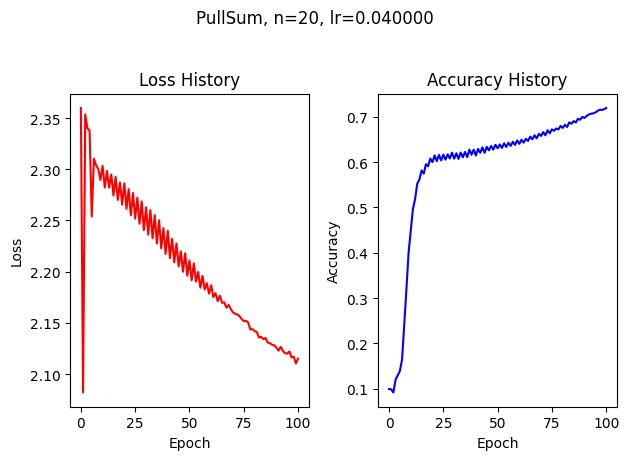

In [68]:
S, S_a1 = train_PullSum(
    n=n,
    A=A,
    B=B,
    model_class=MNISTClassifier_4layer_2,
    seed_for_model=49,
    criterion_class=nn.CrossEntropyLoss,
    epochs=100,
    lr=2e-3,
    X_train_data=h_data,
    y_train_data=y_data,
    X_test_data=X_test,
    y_test_data=y_test,
    compute_accuracy=compute_accuracy_with_average_model,
    show_graph=True
)

Training Progress: 100%|██████████| 100/100 [01:04<00:00,  1.55it/s, accuracy=74.1000000000%, epoch=100, loss=2.1486900926]


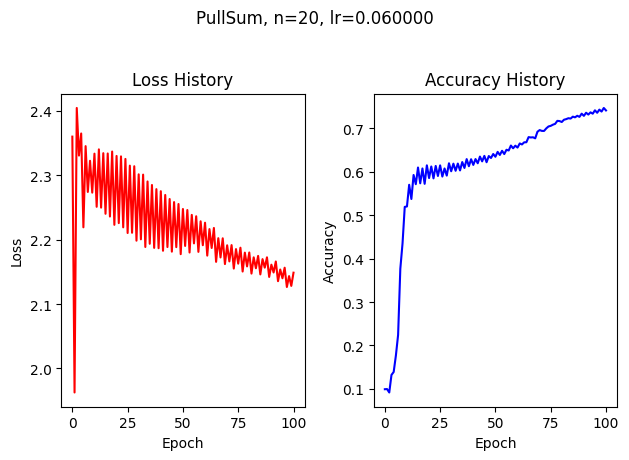

In [69]:
S, S_a2 = train_PullSum(
    n=n,
    A=A,
    B=B,
    model_class=MNISTClassifier_4layer_2,
    seed_for_model=49,
    criterion_class=nn.CrossEntropyLoss,
    epochs=100,
    lr=3e-3,
    X_train_data=h_data,
    y_train_data=y_data,
    X_test_data=X_test,
    y_test_data=y_test,
    compute_accuracy=compute_accuracy_with_average_model,
    show_graph=True
)

Training Progress: 100%|██████████| 100/100 [01:06<00:00,  1.49it/s, accuracy=65.0300000000%, epoch=100, loss=2.1777114868]


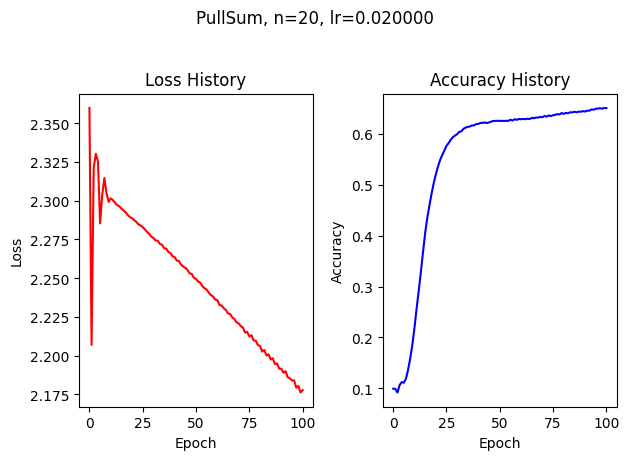

In [71]:
S, S_a3 = train_PullSum(
    n=n,
    A=A,
    B=B,
    model_class=MNISTClassifier_4layer_2,
    seed_for_model=49,
    criterion_class=nn.CrossEntropyLoss,
    epochs=100,
    lr=1e-3,
    X_train_data=h_data,
    y_train_data=y_data,
    X_test_data=X_test,
    y_test_data=y_test,
    compute_accuracy=compute_accuracy_with_average_model,
    show_graph=True
)

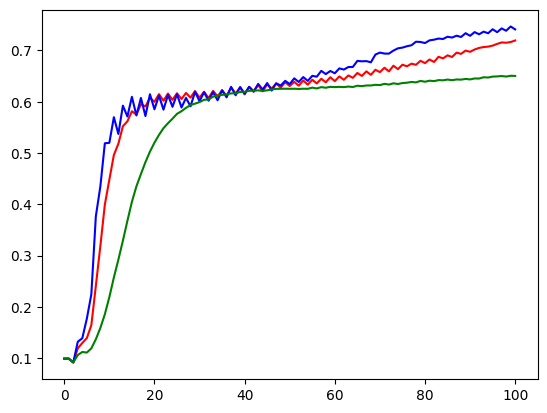

In [72]:
plt.plot(S_a1,color='r')
plt.plot(S_a2,color='b')
plt.plot(S_a3,color='g')
plt.show()